### Run the following if using Google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -a /content/drive/Othercomputers/My\ Laptop/SIS6116\ -\ Assignment1/data/ /content/
!cp -a /content/drive/Othercomputers/My\ Laptop/SIS6116\ -\ Assignment1/modules/ /content/

Mounted at /content/drive


### Parse TSP file

In [1]:
import os
from modules.tsp_file_parser.tsp_file_parser import TSP

# problemName = "ulysses16.tsp"
# problemName = "a280.tsp"
problemName = "berlin52.tsp"
currentFolderPath = os.path.abspath("")
tspFilePath = os.path.join(currentFolderPath, f"data/{problemName}")
print("Loading .tsp file from path: " + tspFilePath)

tsp = TSP(tspFilePath)
print(tsp.name + " was loaded")

Loading .tsp file from path: c:\git\SIS6116 - Assignment1\data/berlin52.tsp
berlin52 was loaded


### Plot TSP Graph

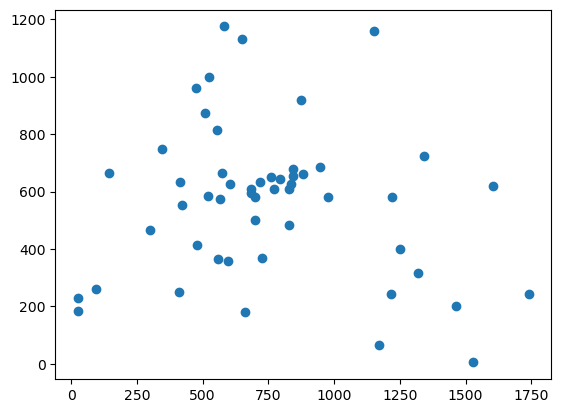

In [2]:
import matplotlib.pyplot as plt


x_values: list[float] = [i[0] for i in tsp.nodeCoords]
y_values: list[float] = [i[1] for i in tsp.nodeCoords]

figure1, axis = plt.subplots()  # type: ignore
axis.scatter(x_values, y_values)  # type: ignore
plottedLines = axis.plot([], [], "r-", zorder=0)  # type: ignore

### Initialise ACO (AS) parameters

In [3]:
from modules.aco.node import Node
from modules.aco.ant_colony import AntColony

NUMBER_OF_ANTS: int = 104
ALPHA: float = 1
BETA: float = 3
RHO: float = 0.1
Q: float = 1000
INITIAL_PHEROMONE_LEVEL: float = 1
MAXIMUM_NUMBER_OF_ITERATIONS: int = 1000

nodes: list[Node] = [Node(n[0], n[1]) for n in tsp.nodeCoords]

ant_colony = AntColony(
    number_of_ants=NUMBER_OF_ANTS,
    alpha=ALPHA,
    beta=BETA,
    rho=RHO,
    q=Q,
    initial_pheromone_level=INITIAL_PHEROMONE_LEVEL,
    maximum_number_of_iterations=MAXIMUM_NUMBER_OF_ITERATIONS,
    nodes=nodes,
)

### Compute Shortest Path (animated output)

In [ ]:
from matplotlib.animation import FuncAnimation

plottedLines[0].set_data(x_values, y_values)  # type: ignore


def create_tour_coords(tour: list[int]) -> list[tuple[float, float]]:
    coords: list[tuple[float, float]] = []
    for n in tour:
        coords.append((x_values[n], y_values[n]))

    return coords


def update_data(frame):  # type: ignore
    ant_colony.iterate()

    tour_coords: list[tuple[float, float]] = create_tour_coords(ant_colony.best_tour)
    x_tour_coords: list[float] = [c[0] for c in tour_coords]
    y_tour_coords: list[float] = [c[1] for c in tour_coords]

    plottedLines[0].set_data(x_tour_coords, y_tour_coords)
    axis.set_title(
        f"Iteration {frame + 1}\nTotal cost = {int(ant_colony.best_tour_cost)}"
    )

    return plottedLines[0]


funcAnimation = FuncAnimation(fig=figure1, func=update_data, frames=MAXIMUM_NUMBER_OF_ITERATIONS, interval=25, repeat=False)  # type: ignore

plt.show()  # type: ignore

print(f"Best cost found: {ant_colony.best_tour_cost}")

# a280.tsp
# best so far is cost of 3050 with
# NUMBER_OF_ANTS: int = 30
# ALPHA: float = 1
# BETA: float = 3
# RHO: float = 0.1
# INITIAL_PHEROMONE_LEVEL: float = 1
# MAXIMUM_NUMBER_OF_ITERATIONS: int = 300

# berlin52.tsp
# best so far is cost of 7544 with
# NUMBER_OF_ANTS: int = 104
# ALPHA: float = 1
# BETA: float = 3
# RHO: float = 0.1
# INITIAL_PHEROMONE_LEVEL: float = 1
# MAXIMUM_NUMBER_OF_ITERATIONS: int = 1000


Best cost found: inf


### Compute Shortest Path (console output)

In [4]:
for i in range(MAXIMUM_NUMBER_OF_ITERATIONS):
    if i > MAXIMUM_NUMBER_OF_ITERATIONS:
        break

    ant_colony.iterate()
    print(f"Iteration {i + 1}\nTotal cost = {int(ant_colony.best_tour_cost)}")

print(ant_colony.best_tour)

Iteration 1
Total cost = 9669
Iteration 2
Total cost = 9131
Iteration 3
Total cost = 8615
Iteration 4
Total cost = 8615
Iteration 5
Total cost = 8615
Iteration 6
Total cost = 8615
Iteration 7
Total cost = 8268
Iteration 8
Total cost = 8268
Iteration 9
Total cost = 8268
Iteration 10
Total cost = 8005
Iteration 11
Total cost = 8005
Iteration 12
Total cost = 8005
Iteration 13
Total cost = 8005
Iteration 14
Total cost = 8005
Iteration 15
Total cost = 8005
Iteration 16
Total cost = 8005
Iteration 17
Total cost = 8005
Iteration 18
Total cost = 8005
Iteration 19
Total cost = 8005
Iteration 20
Total cost = 7704
Iteration 21
Total cost = 7704
Iteration 22
Total cost = 7704
Iteration 23
Total cost = 7704
Iteration 24
Total cost = 7704
Iteration 25
Total cost = 7704
Iteration 26
Total cost = 7704
Iteration 27
Total cost = 7704
Iteration 28
Total cost = 7704
Iteration 29
Total cost = 7681
Iteration 30
Total cost = 7681
Iteration 31
Total cost = 7681
Iteration 32
Total cost = 7681
Iteration 33
Tota